In [1]:
import tftables
import tensorflow as tf
import numpy as np
import time

from vae import VariationalAutoencoder
from conv_vae import ConvolutionalVAE

%load_ext autoreload
%autoreload 2

In [2]:
network_architecture = {
    "input_size": 50000,
    "latent_representation_size": 40,
    "encoder_layer_sizes": [50000, 100, 100, 90, 90, 80, 80, 80],
    "decoder_layer_sizes": [40, 80, 80, 90, 90, 100, 100, 50000],
    "metals_predictor_layer_sizes": [40, 20, 20, 20, 10, 10, 10, 5, 2]
}
learning_rate = .0005
batch_size = 50

vae = ConvolutionalVAE(network_architecture, learning_rate=learning_rate, batch_size=batch_size)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [ ]:
training_epochs = 200
n_samples = 8000
total_batches = int(n_samples / batch_size)
display_step = 10

previous_time = time.time()
for epoch in range(training_epochs):
    for batch in range(total_batches):
        _, cost, l1_loss, r_cost, l_cost, _, m_cost = vae.optimize()
        
        if batch % display_step == display_step - 1:
            print("E%02d" % (epoch+1), "B%03d" % (batch+1),
                  "Iter", "%06d" % (epoch * total_batches + (batch+1)), "|", 
                  "r_cost={:.3f}".format(r_cost),
                  "l_cost={:.3f}".format(l_cost),
                  "l1_loss={:.3f}".format(l1_loss),
                  "m_cost={:.3f}".format(m_cost),
                  "time={:.1f}".format(time.time() - previous_time))
            previous_time = time.time()

E01 B010 Iter 000010 | r_cost=375515.156 l_cost=47018.320 l1_loss=0.310 m_cost=2.116 time=23.6
E01 B020 Iter 000020 | r_cost=239745.516 l_cost=10088.994 l1_loss=0.167 m_cost=1.282 time=22.9
E01 B030 Iter 000030 | r_cost=224782.844 l_cost=8685.312 l1_loss=0.154 m_cost=1.194 time=22.5
E01 B040 Iter 000040 | r_cost=209608.562 l_cost=7688.244 l1_loss=0.160 m_cost=1.269 time=23.0
E01 B050 Iter 000050 | r_cost=210291.281 l_cost=7369.156 l1_loss=0.163 m_cost=0.817 time=22.6
E01 B060 Iter 000060 | r_cost=201744.328 l_cost=5138.687 l1_loss=0.129 m_cost=0.654 time=22.6
E01 B070 Iter 000070 | r_cost=218806.938 l_cost=5717.857 l1_loss=0.150 m_cost=0.970 time=23.2
E01 B080 Iter 000080 | r_cost=198199.484 l_cost=5949.449 l1_loss=0.147 m_cost=0.652 time=22.7
E01 B090 Iter 000090 | r_cost=215265.703 l_cost=7427.090 l1_loss=0.166 m_cost=1.063 time=22.9
E01 B100 Iter 000100 | r_cost=189306.797 l_cost=5450.084 l1_loss=0.128 m_cost=0.694 time=23.1
E01 B110 Iter 000110 | r_cost=188571.625 l_cost=6163.791 l

E06 B090 Iter 000890 | r_cost=28280.689 l_cost=2263.463 l1_loss=0.047 m_cost=0.868 time=23.1
E06 B100 Iter 000900 | r_cost=29716.578 l_cost=2056.552 l1_loss=0.049 m_cost=0.656 time=22.7
E06 B110 Iter 000910 | r_cost=29578.770 l_cost=2272.135 l1_loss=0.050 m_cost=0.665 time=23.1
E06 B120 Iter 000920 | r_cost=31355.781 l_cost=2191.815 l1_loss=0.058 m_cost=0.709 time=22.6
E06 B130 Iter 000930 | r_cost=27633.723 l_cost=2032.977 l1_loss=0.046 m_cost=0.859 time=23.2
E06 B140 Iter 000940 | r_cost=26416.379 l_cost=2008.349 l1_loss=0.042 m_cost=0.707 time=23.1
E06 B150 Iter 000950 | r_cost=27689.195 l_cost=2116.635 l1_loss=0.046 m_cost=0.553 time=22.7
E06 B160 Iter 000960 | r_cost=27840.332 l_cost=1971.307 l1_loss=0.048 m_cost=0.629 time=23.2
E07 B010 Iter 000970 | r_cost=29031.619 l_cost=2234.355 l1_loss=0.050 m_cost=0.579 time=22.9
E07 B020 Iter 000980 | r_cost=24816.533 l_cost=2352.218 l1_loss=0.042 m_cost=0.662 time=22.9
E07 B030 Iter 000990 | r_cost=27682.100 l_cost=2322.784 l1_loss=0.048 

E12 B020 Iter 001780 | r_cost=21460.455 l_cost=2333.119 l1_loss=0.043 m_cost=0.556 time=23.6
E12 B030 Iter 001790 | r_cost=22904.152 l_cost=2192.616 l1_loss=0.046 m_cost=0.609 time=23.0
E12 B040 Iter 001800 | r_cost=22205.756 l_cost=2016.210 l1_loss=0.042 m_cost=0.671 time=22.7
E12 B050 Iter 001810 | r_cost=21848.055 l_cost=1938.618 l1_loss=0.039 m_cost=0.617 time=22.5
E12 B060 Iter 001820 | r_cost=23196.590 l_cost=1995.869 l1_loss=0.046 m_cost=0.566 time=22.9
E12 B070 Iter 001830 | r_cost=23076.453 l_cost=2260.593 l1_loss=0.047 m_cost=0.624 time=23.0
E12 B080 Iter 001840 | r_cost=21673.043 l_cost=2003.462 l1_loss=0.040 m_cost=0.449 time=22.7
E12 B090 Iter 001850 | r_cost=21711.674 l_cost=2163.736 l1_loss=0.041 m_cost=0.694 time=22.4
E12 B100 Iter 001860 | r_cost=21339.621 l_cost=2118.436 l1_loss=0.041 m_cost=0.478 time=22.7
E12 B110 Iter 001870 | r_cost=22218.799 l_cost=2214.306 l1_loss=0.043 m_cost=0.609 time=23.0
E12 B120 Iter 001880 | r_cost=22896.461 l_cost=1984.438 l1_loss=0.043 

E18 B010 Iter 002730 | r_cost=18349.141 l_cost=1732.458 l1_loss=0.038 m_cost=0.447 time=23.2
E18 B020 Iter 002740 | r_cost=16899.834 l_cost=1991.884 l1_loss=0.035 m_cost=0.471 time=23.2
E18 B030 Iter 002750 | r_cost=18910.055 l_cost=2005.513 l1_loss=0.040 m_cost=0.566 time=22.9
E18 B040 Iter 002760 | r_cost=17502.883 l_cost=1705.672 l1_loss=0.034 m_cost=0.673 time=22.6
E18 B050 Iter 002770 | r_cost=17952.561 l_cost=1635.314 l1_loss=0.034 m_cost=0.602 time=22.5
E18 B060 Iter 002780 | r_cost=17690.477 l_cost=1689.273 l1_loss=0.035 m_cost=0.483 time=22.7
E18 B070 Iter 002790 | r_cost=18862.199 l_cost=1937.636 l1_loss=0.041 m_cost=0.539 time=22.6
E18 B080 Iter 002800 | r_cost=17927.889 l_cost=1725.583 l1_loss=0.035 m_cost=0.448 time=22.7
E18 B090 Iter 002810 | r_cost=17863.785 l_cost=1919.629 l1_loss=0.038 m_cost=0.670 time=23.2
E18 B100 Iter 002820 | r_cost=17762.842 l_cost=1743.299 l1_loss=0.037 m_cost=0.462 time=23.6
E18 B110 Iter 002830 | r_cost=18905.875 l_cost=1919.703 l1_loss=0.039 

E23 B100 Iter 003620 | r_cost=15337.077 l_cost=1428.449 l1_loss=0.033 m_cost=0.465 time=23.1
E23 B110 Iter 003630 | r_cost=16402.406 l_cost=1579.064 l1_loss=0.036 m_cost=0.472 time=22.4
E23 B120 Iter 003640 | r_cost=15796.686 l_cost=1413.134 l1_loss=0.033 m_cost=0.579 time=22.7
E23 B130 Iter 003650 | r_cost=15129.536 l_cost=1339.721 l1_loss=0.032 m_cost=0.622 time=22.8
E23 B140 Iter 003660 | r_cost=15541.194 l_cost=1313.557 l1_loss=0.032 m_cost=0.516 time=22.7
E23 B150 Iter 003670 | r_cost=14857.926 l_cost=1392.614 l1_loss=0.029 m_cost=0.436 time=23.2
E23 B160 Iter 003680 | r_cost=14727.228 l_cost=1390.283 l1_loss=0.031 m_cost=0.494 time=23.0
E24 B010 Iter 003690 | r_cost=19854.078 l_cost=1444.606 l1_loss=0.047 m_cost=0.560 time=22.7
E24 B020 Iter 003700 | r_cost=15769.227 l_cost=1607.153 l1_loss=0.038 m_cost=0.504 time=22.8
E24 B030 Iter 003710 | r_cost=16566.652 l_cost=1601.460 l1_loss=0.037 m_cost=0.520 time=22.9
E24 B040 Iter 003720 | r_cost=15122.728 l_cost=1418.108 l1_loss=0.033 

E29 B030 Iter 004510 | r_cost=12829.246 l_cost=1258.443 l1_loss=0.031 m_cost=0.354 time=22.9
E29 B040 Iter 004520 | r_cost=11982.184 l_cost=1056.658 l1_loss=0.026 m_cost=0.287 time=23.0
E29 B050 Iter 004530 | r_cost=12137.718 l_cost=1020.967 l1_loss=0.024 m_cost=0.388 time=22.6
E29 B060 Iter 004540 | r_cost=12149.952 l_cost=1068.080 l1_loss=0.026 m_cost=0.400 time=22.6
E29 B070 Iter 004550 | r_cost=12905.343 l_cost=1211.024 l1_loss=0.031 m_cost=0.371 time=22.6
E29 B080 Iter 004560 | r_cost=12226.143 l_cost=1071.342 l1_loss=0.027 m_cost=0.281 time=22.6
E29 B090 Iter 004570 | r_cost=12246.592 l_cost=1182.090 l1_loss=0.028 m_cost=0.345 time=22.7
E29 B100 Iter 004580 | r_cost=12345.920 l_cost=1095.209 l1_loss=0.028 m_cost=0.246 time=23.3
E29 B110 Iter 004590 | r_cost=12996.581 l_cost=1213.685 l1_loss=0.031 m_cost=0.371 time=23.4
E29 B120 Iter 004600 | r_cost=12889.927 l_cost=1100.036 l1_loss=0.028 m_cost=0.371 time=23.0
E29 B130 Iter 004610 | r_cost=12138.034 l_cost=1059.319 l1_loss=0.027 

E34 B120 Iter 005400 | r_cost=11666.274 l_cost=1042.185 l1_loss=0.024 m_cost=0.306 time=22.4
E34 B130 Iter 005410 | r_cost=10873.744 l_cost=993.239 l1_loss=0.023 m_cost=0.378 time=23.0
E34 B140 Iter 005420 | r_cost=11413.659 l_cost=982.131 l1_loss=0.024 m_cost=0.315 time=22.5
E34 B150 Iter 005430 | r_cost=11554.687 l_cost=1005.904 l1_loss=0.024 m_cost=0.275 time=22.6
E34 B160 Iter 005440 | r_cost=11179.657 l_cost=1002.266 l1_loss=0.023 m_cost=0.293 time=22.6
E35 B010 Iter 005450 | r_cost=10952.619 l_cost=1000.757 l1_loss=0.026 m_cost=0.303 time=23.0
E35 B020 Iter 005460 | r_cost=10922.706 l_cost=1146.332 l1_loss=0.025 m_cost=0.363 time=22.8
E35 B030 Iter 005470 | r_cost=11432.470 l_cost=1130.149 l1_loss=0.026 m_cost=0.270 time=22.6
E35 B040 Iter 005480 | r_cost=10848.795 l_cost=987.359 l1_loss=0.024 m_cost=0.273 time=22.7
E35 B050 Iter 005490 | r_cost=11150.686 l_cost=973.482 l1_loss=0.023 m_cost=0.385 time=22.6
E35 B060 Iter 005500 | r_cost=11049.720 l_cost=994.290 l1_loss=0.024 m_cos

E40 B050 Iter 006290 | r_cost=10671.212 l_cost=945.548 l1_loss=0.022 m_cost=0.372 time=22.8
E40 B060 Iter 006300 | r_cost=10541.425 l_cost=953.690 l1_loss=0.023 m_cost=0.321 time=23.1
E40 B070 Iter 006310 | r_cost=10951.435 l_cost=1083.598 l1_loss=0.027 m_cost=0.356 time=23.1
E40 B080 Iter 006320 | r_cost=10053.596 l_cost=1004.741 l1_loss=0.022 m_cost=0.260 time=22.8
E40 B090 Iter 006330 | r_cost=10843.274 l_cost=1090.425 l1_loss=0.025 m_cost=0.302 time=23.2
E40 B100 Iter 006340 | r_cost=10465.241 l_cost=1004.721 l1_loss=0.023 m_cost=0.235 time=23.1
E40 B110 Iter 006350 | r_cost=11214.490 l_cost=1057.322 l1_loss=0.027 m_cost=0.333 time=22.4
E40 B120 Iter 006360 | r_cost=10929.446 l_cost=976.212 l1_loss=0.023 m_cost=0.308 time=22.8
E40 B130 Iter 006370 | r_cost=10166.447 l_cost=971.786 l1_loss=0.022 m_cost=0.343 time=22.4
E40 B140 Iter 006380 | r_cost=10719.364 l_cost=967.203 l1_loss=0.023 m_cost=0.313 time=22.6
E40 B150 Iter 006390 | r_cost=10930.266 l_cost=975.743 l1_loss=0.022 m_cost

E45 B140 Iter 007180 | r_cost=10445.395 l_cost=937.937 l1_loss=0.023 m_cost=0.312 time=23.1
E45 B150 Iter 007190 | r_cost=10454.850 l_cost=946.024 l1_loss=0.022 m_cost=0.246 time=22.7
E45 B160 Iter 007200 | r_cost=10095.686 l_cost=947.574 l1_loss=0.022 m_cost=0.268 time=23.3
E46 B010 Iter 007210 | r_cost=9900.096 l_cost=954.797 l1_loss=0.023 m_cost=0.270 time=23.5
E46 B020 Iter 007220 | r_cost=10002.182 l_cost=1058.281 l1_loss=0.025 m_cost=0.337 time=23.2
E46 B030 Iter 007230 | r_cost=11196.043 l_cost=1021.292 l1_loss=0.027 m_cost=0.294 time=22.5
E46 B040 Iter 007240 | r_cost=9572.354 l_cost=929.104 l1_loss=0.020 m_cost=0.243 time=23.1
E46 B050 Iter 007250 | r_cost=10024.272 l_cost=929.064 l1_loss=0.021 m_cost=0.347 time=22.9
E46 B060 Iter 007260 | r_cost=10063.470 l_cost=951.856 l1_loss=0.022 m_cost=0.385 time=22.5
E46 B070 Iter 007270 | r_cost=10289.486 l_cost=1052.059 l1_loss=0.025 m_cost=0.413 time=22.9
E46 B080 Iter 007280 | r_cost=9801.427 l_cost=968.319 l1_loss=0.022 m_cost=0.22

E51 B080 Iter 008080 | r_cost=8908.069 l_cost=950.751 l1_loss=0.020 m_cost=0.239 time=23.0
E51 B090 Iter 008090 | r_cost=9122.015 l_cost=1003.721 l1_loss=0.021 m_cost=0.309 time=22.6
E51 B100 Iter 008100 | r_cost=9135.055 l_cost=958.908 l1_loss=0.021 m_cost=0.214 time=22.9
E51 B110 Iter 008110 | r_cost=9803.466 l_cost=975.977 l1_loss=0.025 m_cost=0.324 time=22.7
E51 B120 Iter 008120 | r_cost=10022.478 l_cost=931.603 l1_loss=0.022 m_cost=0.289 time=23.3
E51 B130 Iter 008130 | r_cost=8880.083 l_cost=921.428 l1_loss=0.019 m_cost=0.328 time=22.6
E51 B140 Iter 008140 | r_cost=9566.665 l_cost=939.478 l1_loss=0.022 m_cost=0.283 time=22.8
E51 B150 Iter 008150 | r_cost=9498.116 l_cost=948.155 l1_loss=0.020 m_cost=0.255 time=22.5
E51 B160 Iter 008160 | r_cost=9033.832 l_cost=944.422 l1_loss=0.020 m_cost=0.298 time=22.8
E52 B010 Iter 008170 | r_cost=9135.340 l_cost=930.102 l1_loss=0.023 m_cost=0.293 time=23.1
E52 B020 Iter 008180 | r_cost=8971.441 l_cost=1013.352 l1_loss=0.022 m_cost=0.311 time=2

E57 B020 Iter 008980 | r_cost=8192.603 l_cost=998.993 l1_loss=0.020 m_cost=0.317 time=23.0
E57 B030 Iter 008990 | r_cost=8944.256 l_cost=975.688 l1_loss=0.023 m_cost=0.292 time=23.1
E57 B040 Iter 009000 | r_cost=8356.433 l_cost=918.726 l1_loss=0.020 m_cost=0.269 time=23.9
E57 B050 Iter 009010 | r_cost=8572.646 l_cost=900.401 l1_loss=0.019 m_cost=0.390 time=22.5
E57 B060 Iter 009020 | r_cost=8661.819 l_cost=913.372 l1_loss=0.020 m_cost=0.342 time=23.0
E57 B070 Iter 009030 | r_cost=8614.756 l_cost=986.962 l1_loss=0.022 m_cost=0.404 time=23.0
E57 B080 Iter 009040 | r_cost=8342.309 l_cost=926.285 l1_loss=0.021 m_cost=0.236 time=23.3
E57 B090 Iter 009050 | r_cost=8605.238 l_cost=996.625 l1_loss=0.022 m_cost=0.341 time=22.5
E57 B100 Iter 009060 | r_cost=8339.250 l_cost=957.464 l1_loss=0.020 m_cost=0.233 time=23.3
E57 B110 Iter 009070 | r_cost=9050.810 l_cost=980.271 l1_loss=0.024 m_cost=0.342 time=22.5
E57 B120 Iter 009080 | r_cost=8875.421 l_cost=911.692 l1_loss=0.021 m_cost=0.281 time=22.9

E62 B120 Iter 009880 | r_cost=8645.514 l_cost=924.420 l1_loss=0.020 m_cost=0.317 time=22.7
E62 B130 Iter 009890 | r_cost=8027.514 l_cost=914.092 l1_loss=0.018 m_cost=0.363 time=23.2
E62 B140 Iter 009900 | r_cost=8310.105 l_cost=922.629 l1_loss=0.020 m_cost=0.298 time=23.0
E62 B150 Iter 009910 | r_cost=8408.602 l_cost=920.215 l1_loss=0.019 m_cost=0.259 time=22.3
E62 B160 Iter 009920 | r_cost=8048.395 l_cost=915.063 l1_loss=0.019 m_cost=0.289 time=22.7
E63 B010 Iter 009930 | r_cost=7907.796 l_cost=922.356 l1_loss=0.020 m_cost=0.274 time=23.2
E63 B020 Iter 009940 | r_cost=7879.639 l_cost=997.751 l1_loss=0.020 m_cost=0.284 time=22.3
E63 B030 Iter 009950 | r_cost=8102.296 l_cost=969.330 l1_loss=0.020 m_cost=0.304 time=22.6
E63 B040 Iter 009960 | r_cost=7849.581 l_cost=911.684 l1_loss=0.018 m_cost=0.257 time=22.8
E63 B050 Iter 009970 | r_cost=8065.823 l_cost=906.228 l1_loss=0.018 m_cost=0.359 time=22.6
E63 B060 Iter 009980 | r_cost=8247.671 l_cost=898.870 l1_loss=0.019 m_cost=0.329 time=22.4

E68 B070 Iter 010790 | r_cost=7645.189 l_cost=977.088 l1_loss=0.020 m_cost=0.384 time=22.7
E68 B080 Iter 010800 | r_cost=7460.718 l_cost=925.993 l1_loss=0.018 m_cost=0.239 time=22.4
E68 B090 Iter 010810 | r_cost=7889.405 l_cost=966.968 l1_loss=0.020 m_cost=0.333 time=22.6
E68 B100 Iter 010820 | r_cost=7576.134 l_cost=923.839 l1_loss=0.018 m_cost=0.220 time=22.8
E68 B110 Iter 010830 | r_cost=8404.306 l_cost=942.380 l1_loss=0.022 m_cost=0.330 time=23.5
E68 B120 Iter 010840 | r_cost=8089.060 l_cost=905.377 l1_loss=0.018 m_cost=0.300 time=22.7
E68 B130 Iter 010850 | r_cost=7657.160 l_cost=903.149 l1_loss=0.018 m_cost=0.384 time=22.7
E68 B140 Iter 010860 | r_cost=8003.676 l_cost=928.686 l1_loss=0.020 m_cost=0.281 time=22.9
E68 B150 Iter 010870 | r_cost=7908.151 l_cost=922.298 l1_loss=0.017 m_cost=0.222 time=23.2
E68 B160 Iter 010880 | r_cost=7740.609 l_cost=923.145 l1_loss=0.020 m_cost=0.300 time=23.0
E69 B010 Iter 010890 | r_cost=7534.999 l_cost=911.754 l1_loss=0.019 m_cost=0.293 time=22.4

E74 B020 Iter 011700 | r_cost=7159.094 l_cost=993.602 l1_loss=0.018 m_cost=0.272 time=22.6
E74 B030 Iter 011710 | r_cost=7267.760 l_cost=951.906 l1_loss=0.019 m_cost=0.296 time=22.4
E74 B040 Iter 011720 | r_cost=7237.160 l_cost=911.125 l1_loss=0.017 m_cost=0.253 time=22.8
E74 B050 Iter 011730 | r_cost=7538.157 l_cost=920.195 l1_loss=0.018 m_cost=0.358 time=22.9
E74 B060 Iter 011740 | r_cost=7618.253 l_cost=920.823 l1_loss=0.019 m_cost=0.314 time=23.0
E74 B070 Iter 011750 | r_cost=7658.070 l_cost=970.307 l1_loss=0.021 m_cost=0.324 time=23.0
E74 B080 Iter 011760 | r_cost=7232.921 l_cost=931.250 l1_loss=0.017 m_cost=0.225 time=22.8
E74 B090 Iter 011770 | r_cost=7468.059 l_cost=953.588 l1_loss=0.019 m_cost=0.307 time=22.6
E74 B100 Iter 011780 | r_cost=7078.777 l_cost=938.862 l1_loss=0.017 m_cost=0.215 time=23.1
E74 B110 Iter 011790 | r_cost=7690.675 l_cost=961.391 l1_loss=0.020 m_cost=0.347 time=22.6
E74 B120 Iter 011800 | r_cost=7601.051 l_cost=911.408 l1_loss=0.017 m_cost=0.318 time=22.9

E79 B130 Iter 012610 | r_cost=6827.269 l_cost=927.003 l1_loss=0.016 m_cost=0.354 time=23.1
E79 B140 Iter 012620 | r_cost=7324.735 l_cost=936.182 l1_loss=0.019 m_cost=0.281 time=23.1
E79 B150 Iter 012630 | r_cost=7123.521 l_cost=930.143 l1_loss=0.016 m_cost=0.209 time=22.4
E79 B160 Iter 012640 | r_cost=6995.855 l_cost=948.115 l1_loss=0.018 m_cost=0.277 time=23.2
E80 B010 Iter 012650 | r_cost=6728.328 l_cost=942.409 l1_loss=0.017 m_cost=0.280 time=23.1
E80 B020 Iter 012660 | r_cost=6894.733 l_cost=985.828 l1_loss=0.019 m_cost=0.309 time=22.8
E80 B030 Iter 012670 | r_cost=6734.720 l_cost=960.403 l1_loss=0.017 m_cost=0.301 time=22.8
E80 B040 Iter 012680 | r_cost=6798.150 l_cost=924.036 l1_loss=0.016 m_cost=0.247 time=22.9
E80 B050 Iter 012690 | r_cost=6900.485 l_cost=919.029 l1_loss=0.016 m_cost=0.343 time=23.0
E80 B060 Iter 012700 | r_cost=6966.351 l_cost=923.531 l1_loss=0.016 m_cost=0.305 time=22.6
E80 B070 Iter 012710 | r_cost=7115.682 l_cost=988.173 l1_loss=0.020 m_cost=0.336 time=22.6

E85 B080 Iter 013520 | r_cost=6574.705 l_cost=936.530 l1_loss=0.017 m_cost=0.245 time=22.5
E85 B090 Iter 013530 | r_cost=7269.470 l_cost=976.214 l1_loss=0.021 m_cost=0.292 time=23.1
E85 B100 Iter 013540 | r_cost=6485.192 l_cost=942.250 l1_loss=0.016 m_cost=0.224 time=23.2
E85 B110 Iter 013550 | r_cost=7198.539 l_cost=991.824 l1_loss=0.020 m_cost=0.316 time=23.0
E85 B120 Iter 013560 | r_cost=7309.917 l_cost=930.354 l1_loss=0.017 m_cost=0.297 time=23.9
E85 B130 Iter 013570 | r_cost=6555.358 l_cost=925.954 l1_loss=0.016 m_cost=0.360 time=23.1
E85 B140 Iter 013580 | r_cost=6895.621 l_cost=948.578 l1_loss=0.017 m_cost=0.295 time=22.6
E85 B150 Iter 013590 | r_cost=6908.325 l_cost=938.352 l1_loss=0.016 m_cost=0.210 time=23.1
E85 B160 Iter 013600 | r_cost=6720.292 l_cost=950.115 l1_loss=0.018 m_cost=0.284 time=22.5
E86 B010 Iter 013610 | r_cost=6523.304 l_cost=950.521 l1_loss=0.017 m_cost=0.290 time=22.7
E86 B020 Iter 013620 | r_cost=6302.441 l_cost=1003.817 l1_loss=0.016 m_cost=0.252 time=22.

E91 B030 Iter 014430 | r_cost=6272.521 l_cost=947.856 l1_loss=0.016 m_cost=0.276 time=23.1
E91 B040 Iter 014440 | r_cost=6287.423 l_cost=920.722 l1_loss=0.014 m_cost=0.231 time=23.0
E91 B050 Iter 014450 | r_cost=6408.009 l_cost=910.731 l1_loss=0.015 m_cost=0.321 time=22.6
E91 B060 Iter 014460 | r_cost=6421.494 l_cost=931.401 l1_loss=0.015 m_cost=0.286 time=22.6
E91 B070 Iter 014470 | r_cost=6528.223 l_cost=966.155 l1_loss=0.018 m_cost=0.326 time=23.7
E91 B080 Iter 014480 | r_cost=6418.310 l_cost=919.961 l1_loss=0.016 m_cost=0.217 time=23.1
E91 B090 Iter 014490 | r_cost=6597.896 l_cost=949.492 l1_loss=0.017 m_cost=0.280 time=22.5
E91 B100 Iter 014500 | r_cost=6362.493 l_cost=929.240 l1_loss=0.016 m_cost=0.206 time=22.4
E91 B110 Iter 014510 | r_cost=6837.530 l_cost=944.518 l1_loss=0.019 m_cost=0.303 time=23.5
E91 B120 Iter 014520 | r_cost=6841.561 l_cost=920.773 l1_loss=0.016 m_cost=0.276 time=23.1
E91 B130 Iter 014530 | r_cost=6424.729 l_cost=915.526 l1_loss=0.016 m_cost=0.337 time=22.9

E96 B140 Iter 015340 | r_cost=6352.944 l_cost=941.995 l1_loss=0.016 m_cost=0.282 time=22.7
E96 B150 Iter 015350 | r_cost=6315.857 l_cost=933.267 l1_loss=0.014 m_cost=0.230 time=22.9
E96 B160 Iter 015360 | r_cost=6127.602 l_cost=937.755 l1_loss=0.016 m_cost=0.219 time=22.6
E97 B010 Iter 015370 | r_cost=6027.028 l_cost=910.381 l1_loss=0.016 m_cost=0.251 time=22.6
E97 B020 Iter 015380 | r_cost=5815.772 l_cost=953.486 l1_loss=0.015 m_cost=0.259 time=23.8
E97 B030 Iter 015390 | r_cost=6464.051 l_cost=952.761 l1_loss=0.018 m_cost=0.280 time=22.8
E97 B040 Iter 015400 | r_cost=6062.100 l_cost=923.939 l1_loss=0.014 m_cost=0.211 time=23.5
E97 B050 Iter 015410 | r_cost=6233.208 l_cost=916.569 l1_loss=0.016 m_cost=0.320 time=22.8
E97 B060 Iter 015420 | r_cost=6178.513 l_cost=912.736 l1_loss=0.015 m_cost=0.296 time=23.1
E97 B070 Iter 015430 | r_cost=6596.932 l_cost=961.001 l1_loss=0.020 m_cost=0.344 time=23.1
E97 B080 Iter 015440 | r_cost=5906.610 l_cost=935.611 l1_loss=0.014 m_cost=0.206 time=22.6

E102 B080 Iter 016240 | r_cost=5864.951 l_cost=925.690 l1_loss=0.015 m_cost=0.223 time=22.3
E102 B090 Iter 016250 | r_cost=6112.188 l_cost=946.314 l1_loss=0.017 m_cost=0.313 time=22.8
E102 B100 Iter 016260 | r_cost=5673.216 l_cost=922.752 l1_loss=0.014 m_cost=0.198 time=22.7
E102 B110 Iter 016270 | r_cost=6276.266 l_cost=941.844 l1_loss=0.018 m_cost=0.247 time=22.5
E102 B120 Iter 016280 | r_cost=6264.609 l_cost=916.582 l1_loss=0.015 m_cost=0.258 time=22.7
E102 B130 Iter 016290 | r_cost=5855.163 l_cost=925.329 l1_loss=0.014 m_cost=0.334 time=22.8
E102 B140 Iter 016300 | r_cost=6082.465 l_cost=933.620 l1_loss=0.015 m_cost=0.282 time=22.7
E102 B150 Iter 016310 | r_cost=6090.864 l_cost=926.819 l1_loss=0.014 m_cost=0.191 time=22.6
E102 B160 Iter 016320 | r_cost=5946.648 l_cost=928.438 l1_loss=0.016 m_cost=0.224 time=23.0
E103 B010 Iter 016330 | r_cost=5889.740 l_cost=918.032 l1_loss=0.016 m_cost=0.252 time=22.9
E103 B020 Iter 016340 | r_cost=5628.292 l_cost=972.565 l1_loss=0.015 m_cost=0.24

E108 B070 Iter 017190 | r_cost=6038.129 l_cost=966.968 l1_loss=0.018 m_cost=0.297 time=22.9
E108 B080 Iter 017200 | r_cost=5594.015 l_cost=928.910 l1_loss=0.013 m_cost=0.217 time=22.8
E108 B090 Iter 017210 | r_cost=6012.100 l_cost=947.865 l1_loss=0.017 m_cost=0.292 time=22.6
E108 B100 Iter 017220 | r_cost=5659.882 l_cost=930.116 l1_loss=0.014 m_cost=0.181 time=22.7
E108 B110 Iter 017230 | r_cost=6169.733 l_cost=949.175 l1_loss=0.019 m_cost=0.249 time=22.5
E108 B120 Iter 017240 | r_cost=6284.509 l_cost=913.625 l1_loss=0.017 m_cost=0.247 time=22.9
E108 B130 Iter 017250 | r_cost=5827.728 l_cost=926.378 l1_loss=0.015 m_cost=0.291 time=23.0
E108 B140 Iter 017260 | r_cost=5946.502 l_cost=943.011 l1_loss=0.015 m_cost=0.235 time=22.6
E108 B150 Iter 017270 | r_cost=5862.321 l_cost=926.968 l1_loss=0.014 m_cost=0.186 time=23.0
E108 B160 Iter 017280 | r_cost=5770.841 l_cost=934.513 l1_loss=0.016 m_cost=0.207 time=22.7
E109 B010 Iter 017290 | r_cost=5573.294 l_cost=933.244 l1_loss=0.014 m_cost=0.23

E114 B010 Iter 018090 | r_cost=5444.163 l_cost=916.688 l1_loss=0.014 m_cost=0.230 time=22.9
E114 B020 Iter 018100 | r_cost=5388.026 l_cost=965.114 l1_loss=0.014 m_cost=0.218 time=22.8
E114 B030 Iter 018110 | r_cost=5424.962 l_cost=935.148 l1_loss=0.014 m_cost=0.276 time=22.7
E114 B040 Iter 018120 | r_cost=5451.212 l_cost=926.961 l1_loss=0.013 m_cost=0.204 time=23.3
E114 B050 Iter 018130 | r_cost=5527.043 l_cost=917.626 l1_loss=0.013 m_cost=0.249 time=22.9
E114 B060 Iter 018140 | r_cost=5490.684 l_cost=921.837 l1_loss=0.013 m_cost=0.205 time=23.5
E114 B070 Iter 018150 | r_cost=5549.573 l_cost=966.764 l1_loss=0.016 m_cost=0.246 time=23.2
E114 B080 Iter 018160 | r_cost=5473.227 l_cost=924.168 l1_loss=0.013 m_cost=0.216 time=22.7
E114 B090 Iter 018170 | r_cost=5756.848 l_cost=933.630 l1_loss=0.016 m_cost=0.307 time=23.0
E114 B100 Iter 018180 | r_cost=5712.485 l_cost=935.461 l1_loss=0.016 m_cost=0.200 time=22.8
E114 B110 Iter 018190 | r_cost=6254.235 l_cost=956.729 l1_loss=0.020 m_cost=0.26

E119 B110 Iter 018990 | r_cost=5572.111 l_cost=940.942 l1_loss=0.017 m_cost=0.232 time=23.7
E119 B120 Iter 019000 | r_cost=5711.296 l_cost=920.132 l1_loss=0.014 m_cost=0.222 time=23.3
E119 B130 Iter 019010 | r_cost=5224.741 l_cost=928.508 l1_loss=0.013 m_cost=0.222 time=22.5
E119 B140 Iter 019020 | r_cost=5425.678 l_cost=940.043 l1_loss=0.014 m_cost=0.225 time=22.7
E119 B150 Iter 019030 | r_cost=5389.132 l_cost=930.533 l1_loss=0.013 m_cost=0.181 time=22.9
E119 B160 Iter 019040 | r_cost=5264.291 l_cost=945.554 l1_loss=0.014 m_cost=0.221 time=23.2
E120 B010 Iter 019050 | r_cost=5328.360 l_cost=928.511 l1_loss=0.015 m_cost=0.241 time=22.9
E120 B020 Iter 019060 | r_cost=5199.274 l_cost=955.985 l1_loss=0.014 m_cost=0.214 time=22.8
E120 B030 Iter 019070 | r_cost=5188.943 l_cost=945.539 l1_loss=0.015 m_cost=0.209 time=23.1
E120 B040 Iter 019080 | r_cost=5112.579 l_cost=934.314 l1_loss=0.012 m_cost=0.172 time=22.3
E120 B050 Iter 019090 | r_cost=5251.675 l_cost=923.996 l1_loss=0.013 m_cost=0.22

In [44]:
for epoch in range(5):
    for batch in range(total_batches):
        _, m_cost = vae.optimize_metals_predictor()
        if batch % display_step == display_step - 1:
            print(batch+1, m_cost)

10 0.2797891
20 0.324551
30 0.29681823
40 0.2327649
50 0.30139324
60 0.30038142
70 0.3804661
80 0.22514014
90 0.31041324
100 0.23195472
110 0.29708084
120 0.31896144
130 0.354982
140 0.36349484
150 0.21472943
160 0.2780801
10 0.29365253
20 0.29907823
30 0.29877535
40 0.23559824
50 0.30772078
60 0.2964435
70 0.39405823
80 0.235979
90 0.3012934
100 0.2275417
110 0.28790534
120 0.31087366
130 0.367777
140 0.34678096
150 0.21820661
160 0.2835377
10 0.2974672
20 0.2920719
30 0.29701832
40 0.22324415
50 0.34665307
60 0.3467063
70 0.36933425
80 0.25010175
90 0.3081145
100 0.23760244
110 0.27725035
120 0.30178234
130 0.37775862
140 0.34247357
150 0.22477742
160 0.28685784
10 0.2775735
20 0.30938184
30 0.31412885
40 0.23913445
50 0.33826515
60 0.33001843
70 0.36120424
80 0.24146877
90 0.2815835
100 0.23394236
110 0.27909756
120 0.30927286
130 0.35884815
140 0.33902934
150 0.25148287
160 0.26679263
10 0.26574183
20 0.30480233
30 0.30186853
40 0.23986632
50 0.32392892
60 0.30749527
70 0.38097557


In [ ]:
# compare to Epoch 20 Batch 160 Iter 003200 | r_cost=17809.174 l_cost=1558.191 l1_loss=0.032 time=8.9

In [3]:
from datetime import datetime
import tables
import matplotlib.pyplot as plt

In [4]:
h5file = tables.open_file('data/sample_8k.h5', 'r')
h5node = h5file.get_node('/spectra')

spectra = h5node[:100]['spectrum']
spectra_slice = spectra[:, 700000:750000]
normalized_spectra = spectra_slice / np.max(spectra_slice, axis=1)[:, np.newaxis]

h5file.close()

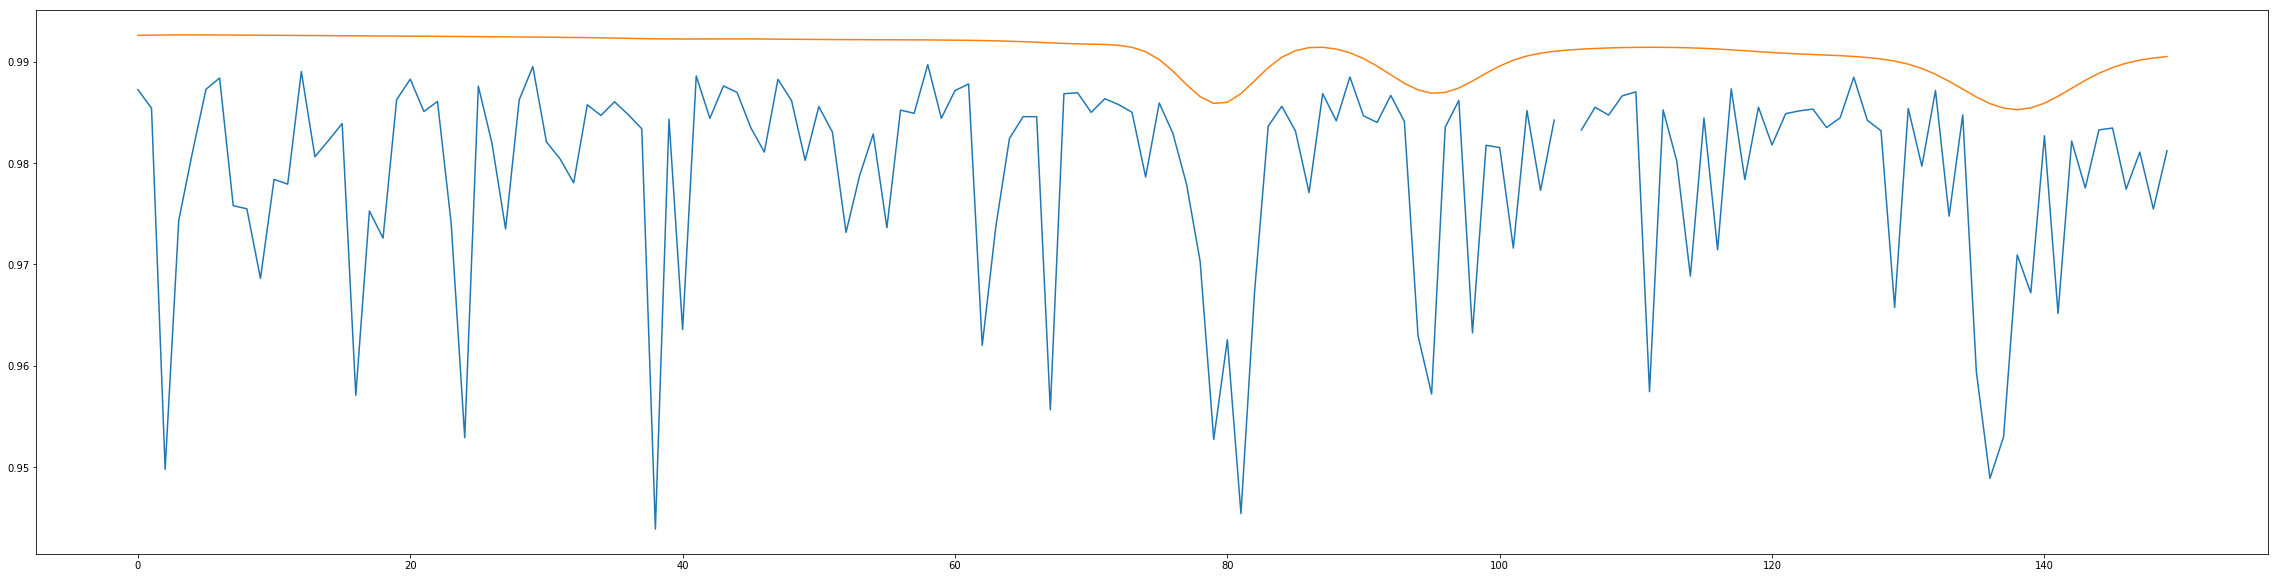

In [27]:
INDEX = 9

reconstruction = vae.reconstruct(normalized_spectra[INDEX])
reconstruction[reconstruction == 0] = np.nan # get rid of zeros just for the plot

plt.figure(figsize=(40,10))
plt.plot(reconstruction[11000:11150])
plt.plot(normalized_spectra[INDEX][11000:11150])

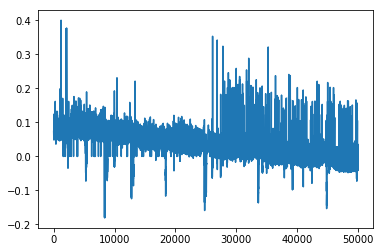

In [10]:
plt.plot(vae.reconstruct(normalized_spectra[0])-vae.reconstruct(normalized_spectra[2]))

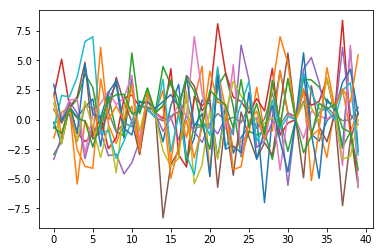

In [11]:
plt.plot(vae.encode(normalized_spectra[0]))
plt.plot(vae.encode(normalized_spectra[1]))
plt.plot(vae.encode(normalized_spectra[2]))
plt.plot(vae.encode(normalized_spectra[3]))
plt.plot(vae.encode(normalized_spectra[4]))
plt.plot(vae.encode(normalized_spectra[5]))
plt.plot(vae.encode(normalized_spectra[6]))
plt.plot(vae.encode(normalized_spectra[7]))
plt.plot(vae.encode(normalized_spectra[8]))
plt.plot(vae.encode(normalized_spectra[9]))
plt.plot(vae.encode(normalized_spectra[10]))
plt.plot(vae.encode(normalized_spectra[11]))
plt.plot(vae.encode(normalized_spectra[12]))

In [14]:
outfile_name = 'output/output-{}'.format(datetime.now().strftime('%y%m%d-%H%M%S'))
vae.save(outfile_name)

saved to output/output-191002-000332


In [5]:
vae.restore('output/output-191002-000332')

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from output/output-191002-000332
loaded model weights from output/output-191002-000332


In [31]:
vae.close()